In [ ]:
%-Welcome
spm('asciiwelcome');
% [vspm,rspm] = spm('Ver');
% tlkt = ver(spm_check_version);
% fprintf('%s, version %s\n',vspm,rspm);
% fprintf('%s, version %s\n',tlkt.Name,version);

In [ ]:
% INITIALIZATION
% Initialize directory structure
data_dir = fullfile(getenv('HOME'),'ds000157-download');
spm_dir = fullfile(getenv('HOME'),'spm12');
results_dir = fullfile(getenv('HOME'),'results');
stats_dir = [results_dir filesep 'stats'];
processing_dir = [results_dir filesep 'preproc_data'];
if ~exist(stats_dir,'dir')
    mkdir(stats_dir)
end
if ~exist(processing_dir,'dir')
    mkdir(processing_dir)
end
% Initialize subject data
sub = '01';
s_raw_fn = fullfile(data_dir, ['sub-' sub], 'anat', ['sub-' sub '_T1w.nii.gz']);
if exist(s_raw_fn, 'file')
    out_fns = gunzip(s_raw_fn);
    s_fn = out_fns{1};
else
    s_fn = strrep(s_raw_fn, '.gz', '');
end
f_raw_fn = fullfile(data_dir, ['sub-' sub], 'func', ['sub-' sub '_task-passiveimageviewing_bold.nii.gz']);
if exist(f_raw_fn, 'file')
    out_fns = gunzip(f_raw_fn);
    f_fn = out_fns{1};
else
    f_fn = strrep(f_raw_fn, '.gz', '');
end
anat_fn = fullfile(processing_dir, ['sub-' sub], 'anat', ['sub-' sub '_T1w.nii']);
func_fn = fullfile(processing_dir, ['sub-' sub], 'func', ['sub-' sub '_task-passiveimageviewing_bold.nii']);
copyfile(s_fn, anat_fn)
copyfile(f_fn, func_fn)
% Initialize processing variables
fwhm = 6;  % mm

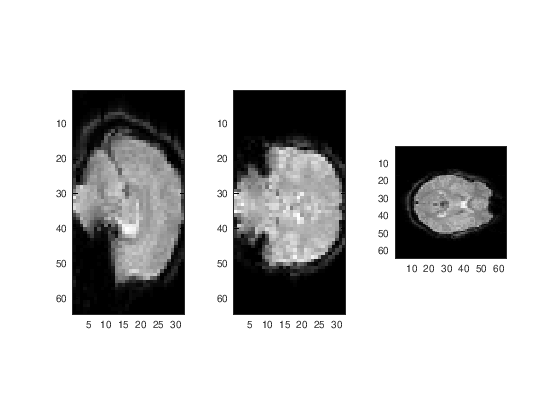

In [8]:
func_4Dimg = spm_read_vols(spm_vol(rest_fn));

[Ni, Nj, Nk, Nt] = size(func_4Dimg);
subplot(131); imagesc(squeeze(func_4Dimg(round(Ni/2),:,:,1))); colormap gray; axis image
subplot(132); imagesc(squeeze(func_4Dimg(:,round(Nj/2),:,1))); colormap gray; axis image
subplot(133); imagesc(squeeze(func_4Dimg(:,:,round(Nk/2),1))); colormap gray; axis image